<dl>
    <center><h1>Basic usage: Music Audio Tagging</h1>
    <h3>musiCNN allows predicting music tags with just two lines of code</h3></center>
</dl>


In the following, you will learn how to use `musiCNN` to automatically tag your music.
To start, let's consider this music clip:

In [1]:
file_name = './audio/TRWJAZW128F42760DD_test.mp3'

Run these two code lines to predict the `top3` most likely tags according to our `MTT model`:

In [2]:
from musiCNN.tagger import top_tags
tags = top_tags(file_name, model='MTT', topN=5)

Computing spectrogram (w/ librosa) and tags (w/ tensorflow)..


100%|██████████| 9/9 [00:00<00:00, 22.29it/s]

 - guitar
 - piano
 - fast
 - country
 - classical


### Are you interested in the temporal evolution of these tags? 

Instead of predicting song-level tags, you can also plot the **Taggram**:

In [3]:
from musiCNN.extractor import extractor
taggram, tags = extractor(file_name, model='MTT')

Computing spectrogram (w/ librosa) and tags (w/ tensorflow)..


100%|██████████| 9/9 [00:00<00:00, 22.96it/s]


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
in_length = 3 # seconds -- by default, the model takes inputs of 3 seconds with no overlap

plt.rcParams["figure.figsize"] = (10,8) # set size of the figures
fontsize = 12 # set figures font size

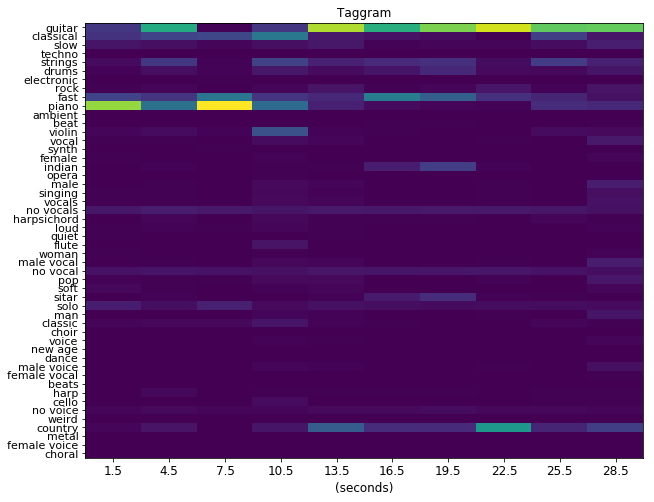

In [6]:
fig, ax = plt.subplots()

# title
ax.title.set_text('Taggram')
ax.title.set_fontsize(fontsize)

# x-axis title
ax.set_xlabel('(seconds)', fontsize=fontsize)

# y-axis
y_pos = np.arange(len(tags))
ax.set_yticks(y_pos)
ax.set_yticklabels(tags, fontsize=fontsize-1)

# x-axis
x_pos = np.arange(taggram.shape[0])
x_label = np.arange(in_length/2, in_length*taggram.shape[0], 3)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_label, fontsize=fontsize)

# depict taggram
ax.imshow(taggram.T, interpolation=None, aspect="auto")
plt.show()

### How did we compute the top3 tags?

Note that the Taggram can be interpreted as the temporal evolution of the tags likelihood.

From the Taggram, we can compute the **song-level tags likelihood** by simply averaging through time:

In [7]:
tags_likelihood_mean = np.mean(taggram, axis=0) # averaging the Taggram through time 

This song-level tags likelihood has the following shape:

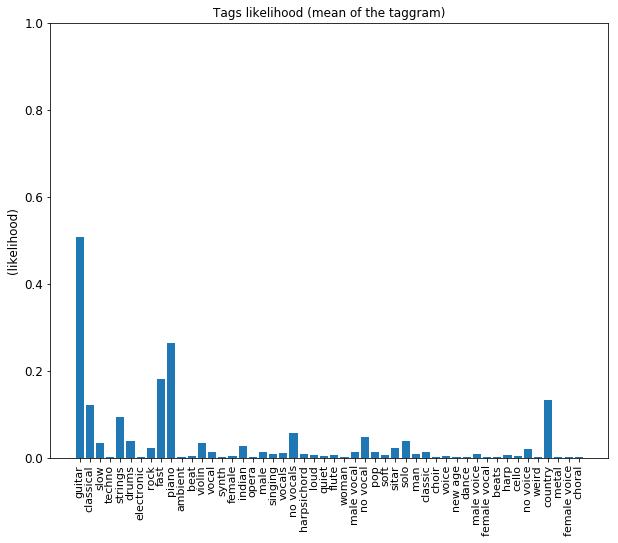

In [8]:
fig, ax = plt.subplots()

# title
ax.title.set_text('Tags likelihood (mean of the taggram)')
ax.title.set_fontsize(fontsize)

# y-axis title
ax.set_ylabel('(likelihood)', fontsize=fontsize)

# y-axis
ax.set_ylim((0, 1))
ax.tick_params(axis="y", labelsize=fontsize)

# x-axis
ax.tick_params(axis="x", labelsize=fontsize-1)
pos = np.arange(len(tags))
ax.set_xticks(pos)
ax.set_xticklabels(tags, rotation=90)

# depict song-level tags likelihood
ax.bar(pos, tags_likelihood_mean)
plt.show()

From the above tags likelihood, the `top_tag()` function computes the **top3 tags** as follows:

In [9]:
topN = 3
for tag_index in tags_likelihood_mean.argsort()[-topN:][::-1]:
    print(' - ' + tags[tag_index])

 - guitar
 - piano
 - fast
